In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=300

sns.set_style("darkgrid") #background

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [155]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [156]:
df.head()


Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [157]:
df.tail()

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114

In [158]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [160]:
df=pd.get_dummies(df,columns=["Fuel_Type"],drop_first=True)


In [161]:
df.head()

Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              True             False  
1    1165              True             False  
2    1165              True             False  
3    1165              True             False  
4    1170              True             False

In [162]:
df.rename(columns={"Age_08_04":"Age","Fuel_Type_Diesel":"Diesel","Fuel_Type_Petrol":"Petrol",'cc':"CC"},inplace=True)

In [164]:
df.head()

Price  Age     KM  HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
0  13500   23  46986  90          0  2000      3          4      5    1165   
1  13750   23  72937  90          0  2000      3          4      5    1165   
2  13950   24  41711  90          0  2000      3          4      5    1165   
3  14950   26  48000  90          0  2000      3          4      5    1165   
4  13750   30  38500  90          0  2000      3          4      5    1170   

   Diesel  Petrol  
0    True   False  
1    True   False  
2    True   False  
3    True   False  
4    True   False

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Automatic  1436 non-null   int64
 5   CC         1436 non-null   int64
 6   Doors      1436 non-null   int64
 7   Cylinders  1436 non-null   int64
 8   Gears      1436 non-null   int64
 9   Weight     1436 non-null   int64
 10  Diesel     1436 non-null   bool 
 11  Petrol     1436 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 115.1 KB


In [165]:
df["Automatic"].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [166]:
df["Doors"].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [167]:
df["Gears"].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

In [168]:
df.describe()

Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                CC        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [169]:
sns.pairplot(df)
plt.tight_layout()

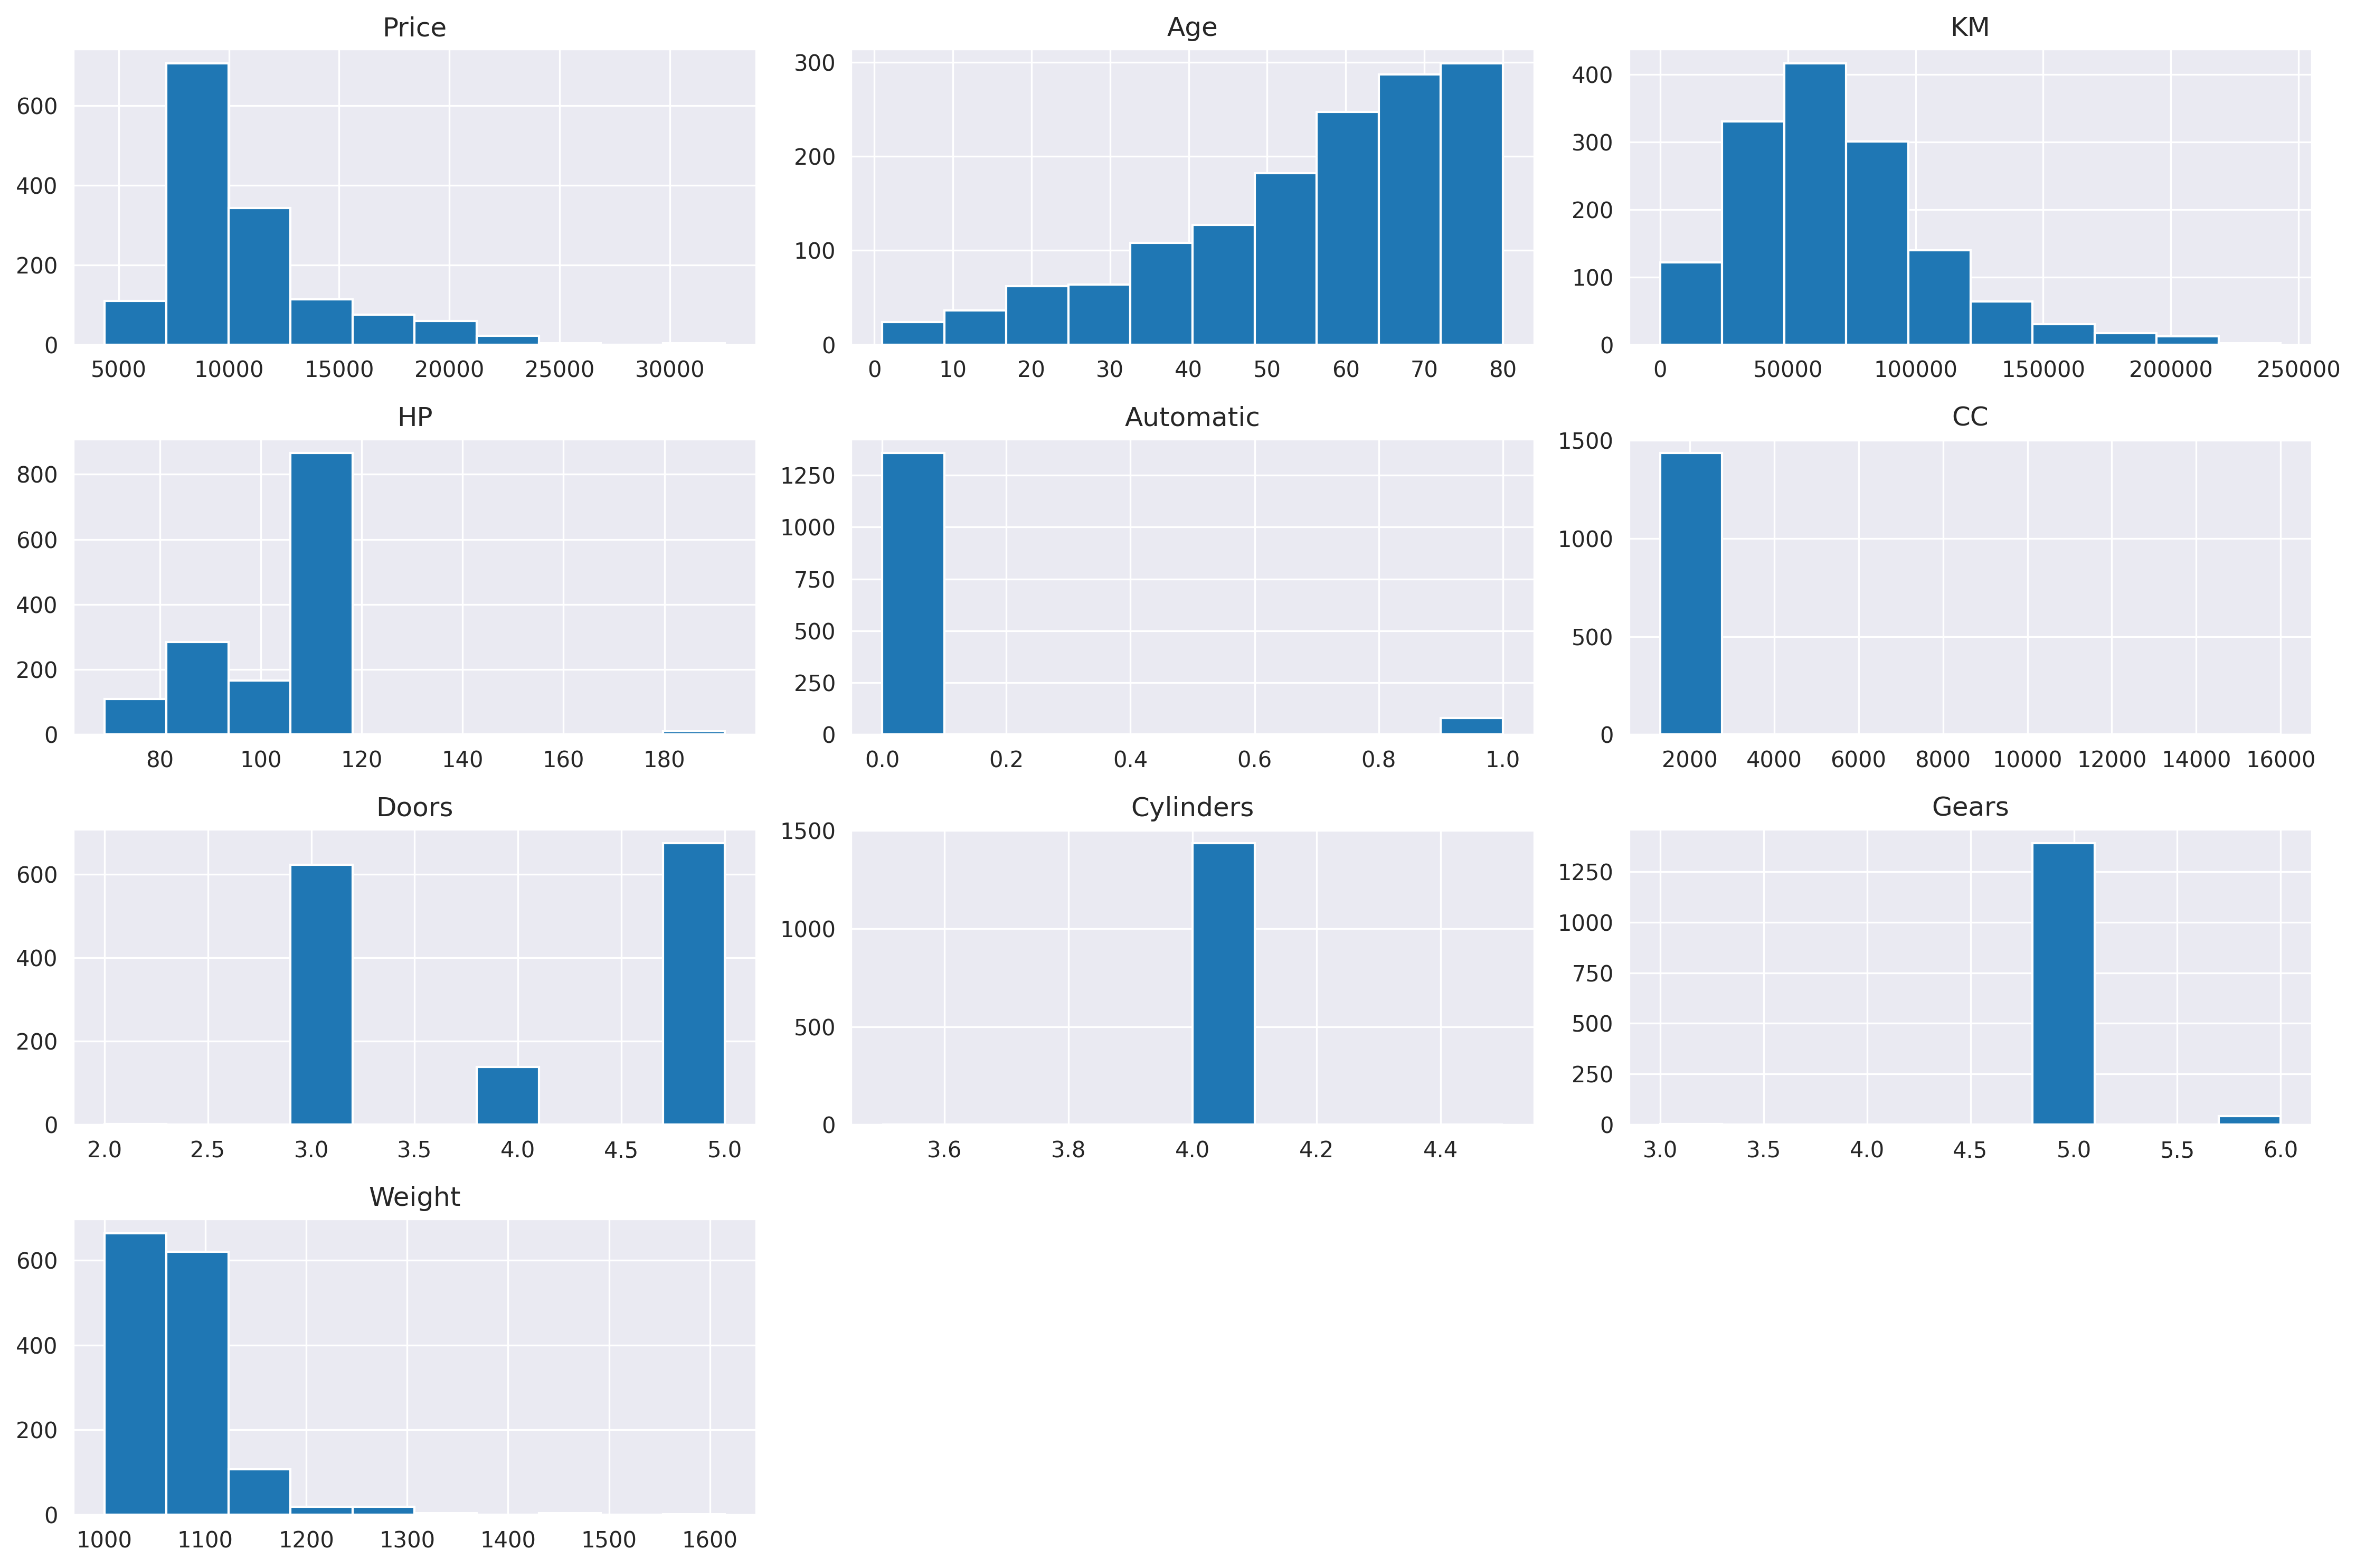

In [170]:
df.hist(figsize=(15,10))
plt.tight_layout()

<Axes: >

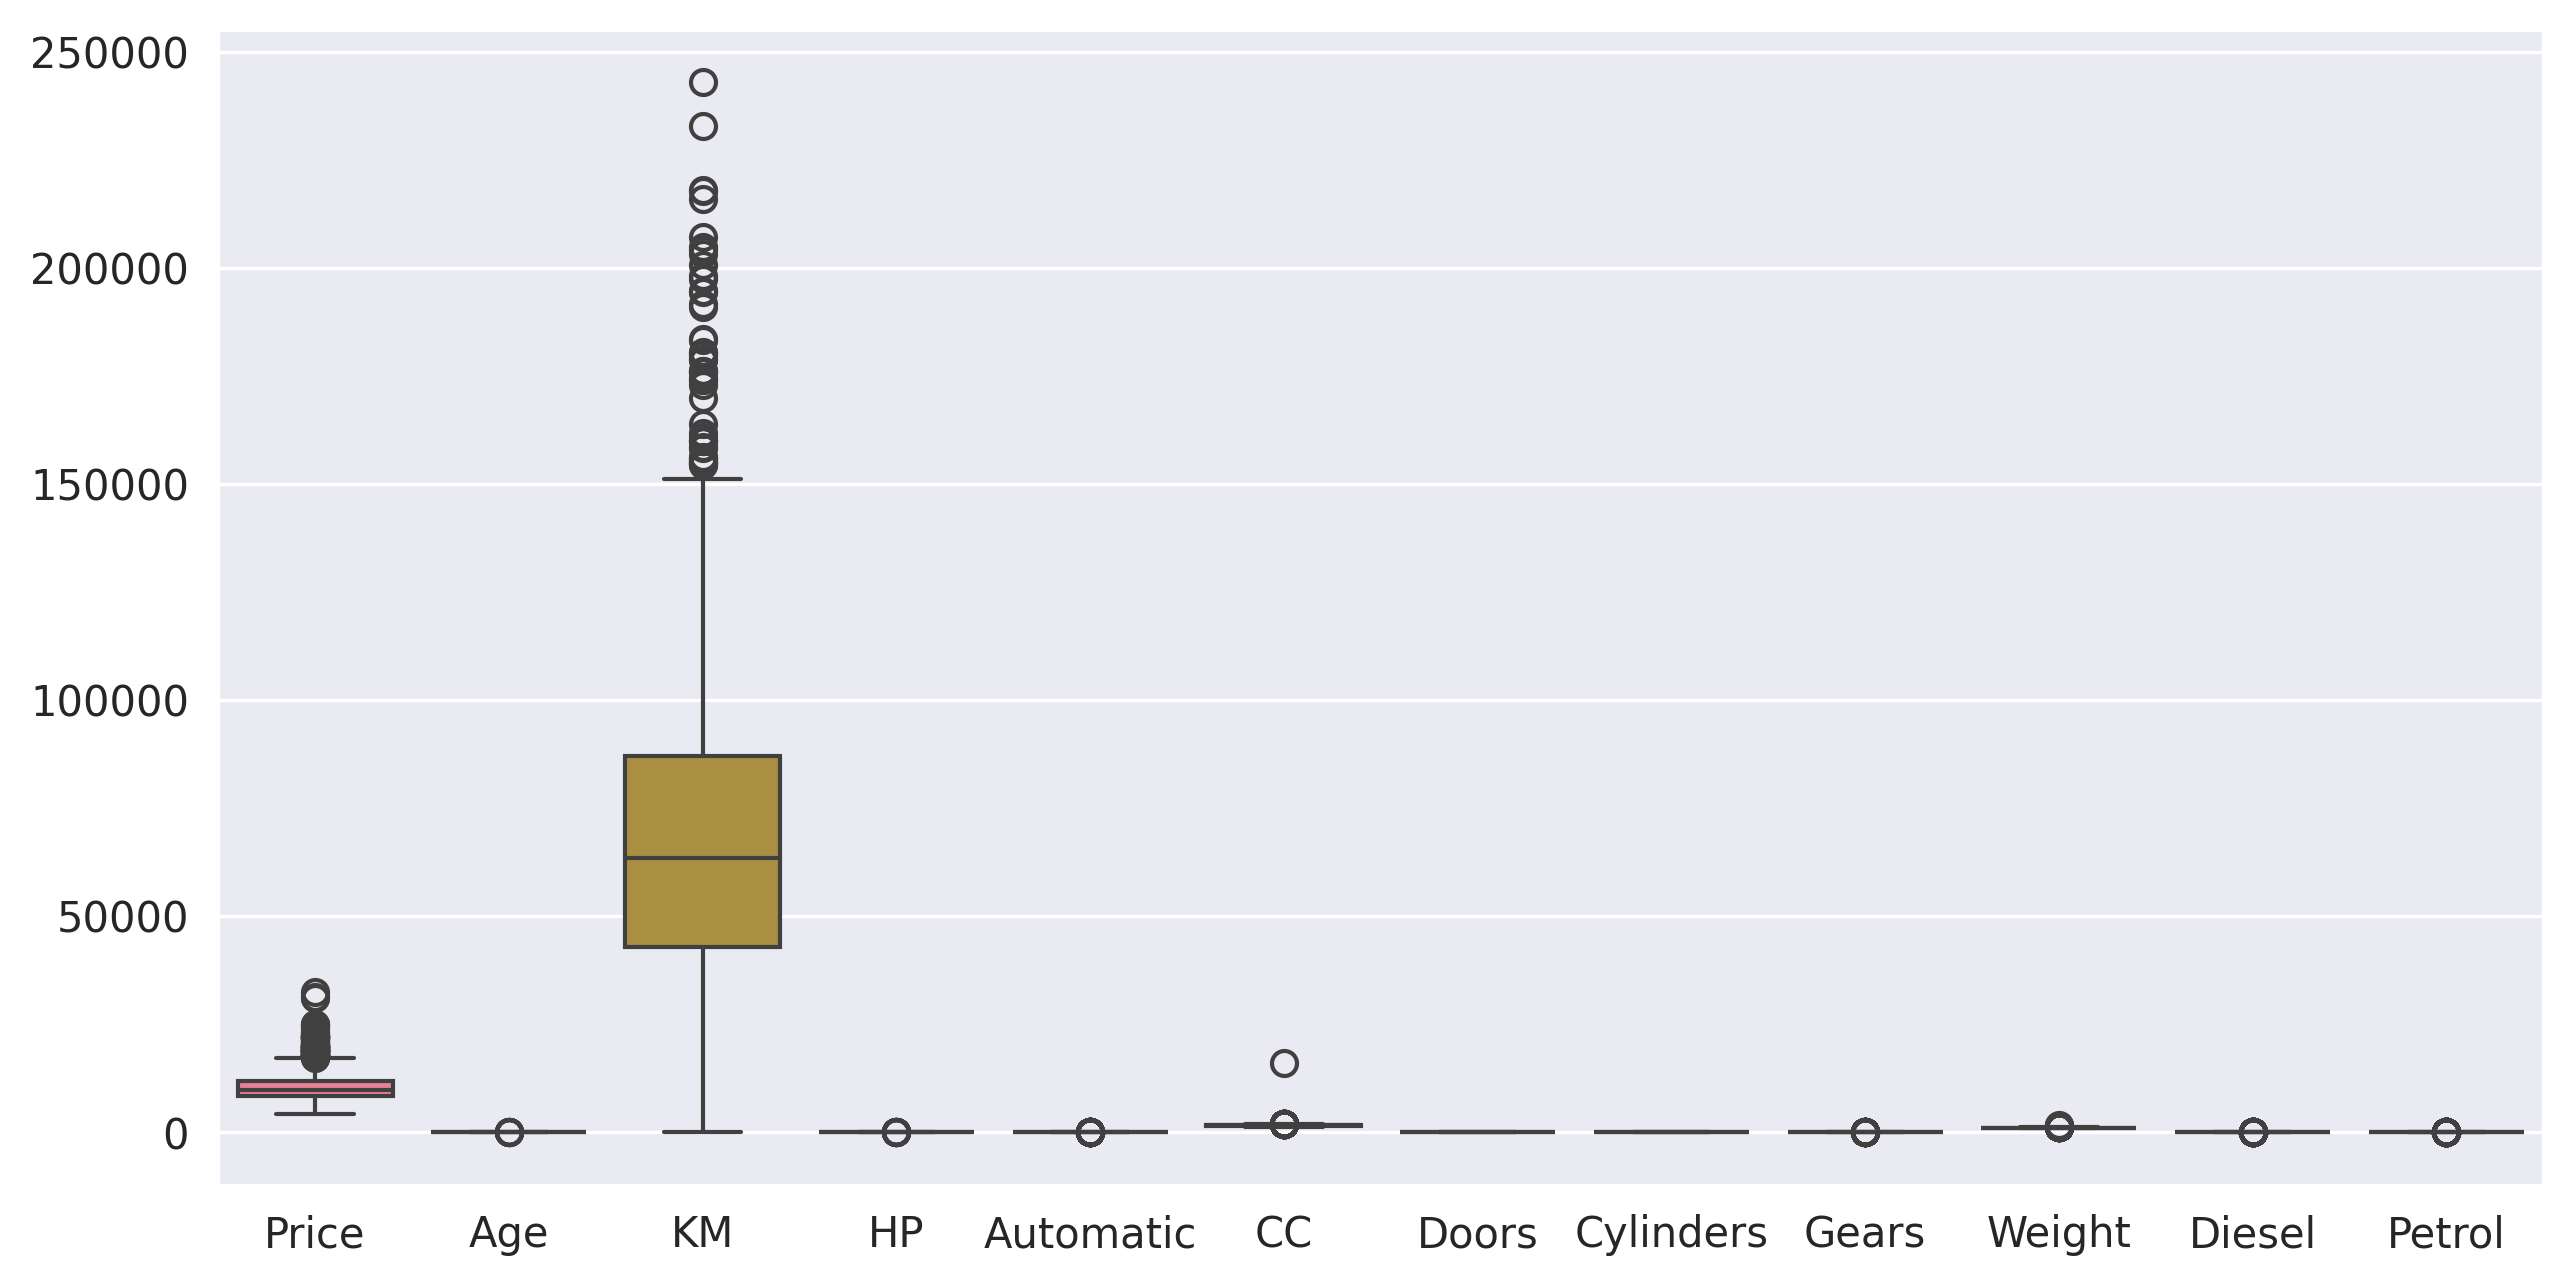

In [171]:
sns.boxplot(df)

In [172]:
df.corr()

Price       Age        KM        HP  Automatic        CC  \
Price      1.000000 -0.876590 -0.569960  0.314990   0.033081  0.126389   
Age       -0.876590  1.000000  0.505672 -0.156622   0.031717 -0.098084   
KM        -0.569960  0.505672  1.000000 -0.333538  -0.081854  0.102683   
HP         0.314990 -0.156622 -0.333538  1.000000   0.013144  0.035856   
Automatic  0.033081  0.031717 -0.081854  0.013144   1.000000  0.066740   
CC         0.126389 -0.098084  0.102683  0.035856   0.066740  1.000000   
Doors      0.185326 -0.148359 -0.036197  0.092424  -0.027654  0.079903   
Cylinders       NaN       NaN       NaN       NaN        NaN       NaN   
Gears      0.063104 -0.005364  0.015023  0.209477  -0.098555  0.014629   
Weight     0.581198 -0.470253 -0.028598  0.089614   0.057249  0.335637   
Diesel     0.054084 -0.097740  0.403060 -0.533453  -0.084490  0.327723   
Petrol    -0.038516  0.092611 -0.433160  0.489110   0.080249 -0.315170   

              Doors  Cylinders     Gears    Weight    Diesel    Petrol  
Price      0.185326        NaN  0.063104  0.581198  0.054084 -0.038516  
Age       -0.148359        NaN -0.005364 -0.470253 -0.097740  0.092611  
KM        -0.036197        NaN  0.015023 -0.028598  0.403060 -0.433160  
HP         0.092424        NaN  0.209477  0.089614 -0.533453  0.489110  
Automatic -0.027654        NaN -0.098555  0.057249 -0.084490  0.080249  
CC         0.079903        NaN  0.014629  0.335637  0.327723 -0.315170  
Doors      1.000000        NaN -0.160141  0.302618  0.025495 -0.027589  
Cylinders       NaN        NaN       NaN       NaN       NaN       NaN  
Gears     -0.160141        NaN  1.000000  0.020613 -0.048847  0.063182  
Weight     0.302618        NaN  0.020613  1.000000  0.568087 -0.560470  
Diesel     0.025495        NaN -0.048847  0.568087  1.000000 -0.942976  
Petrol    -0.027589        NaN  0.063182 -0.560470 -0.942976  1.000000

<Axes: >

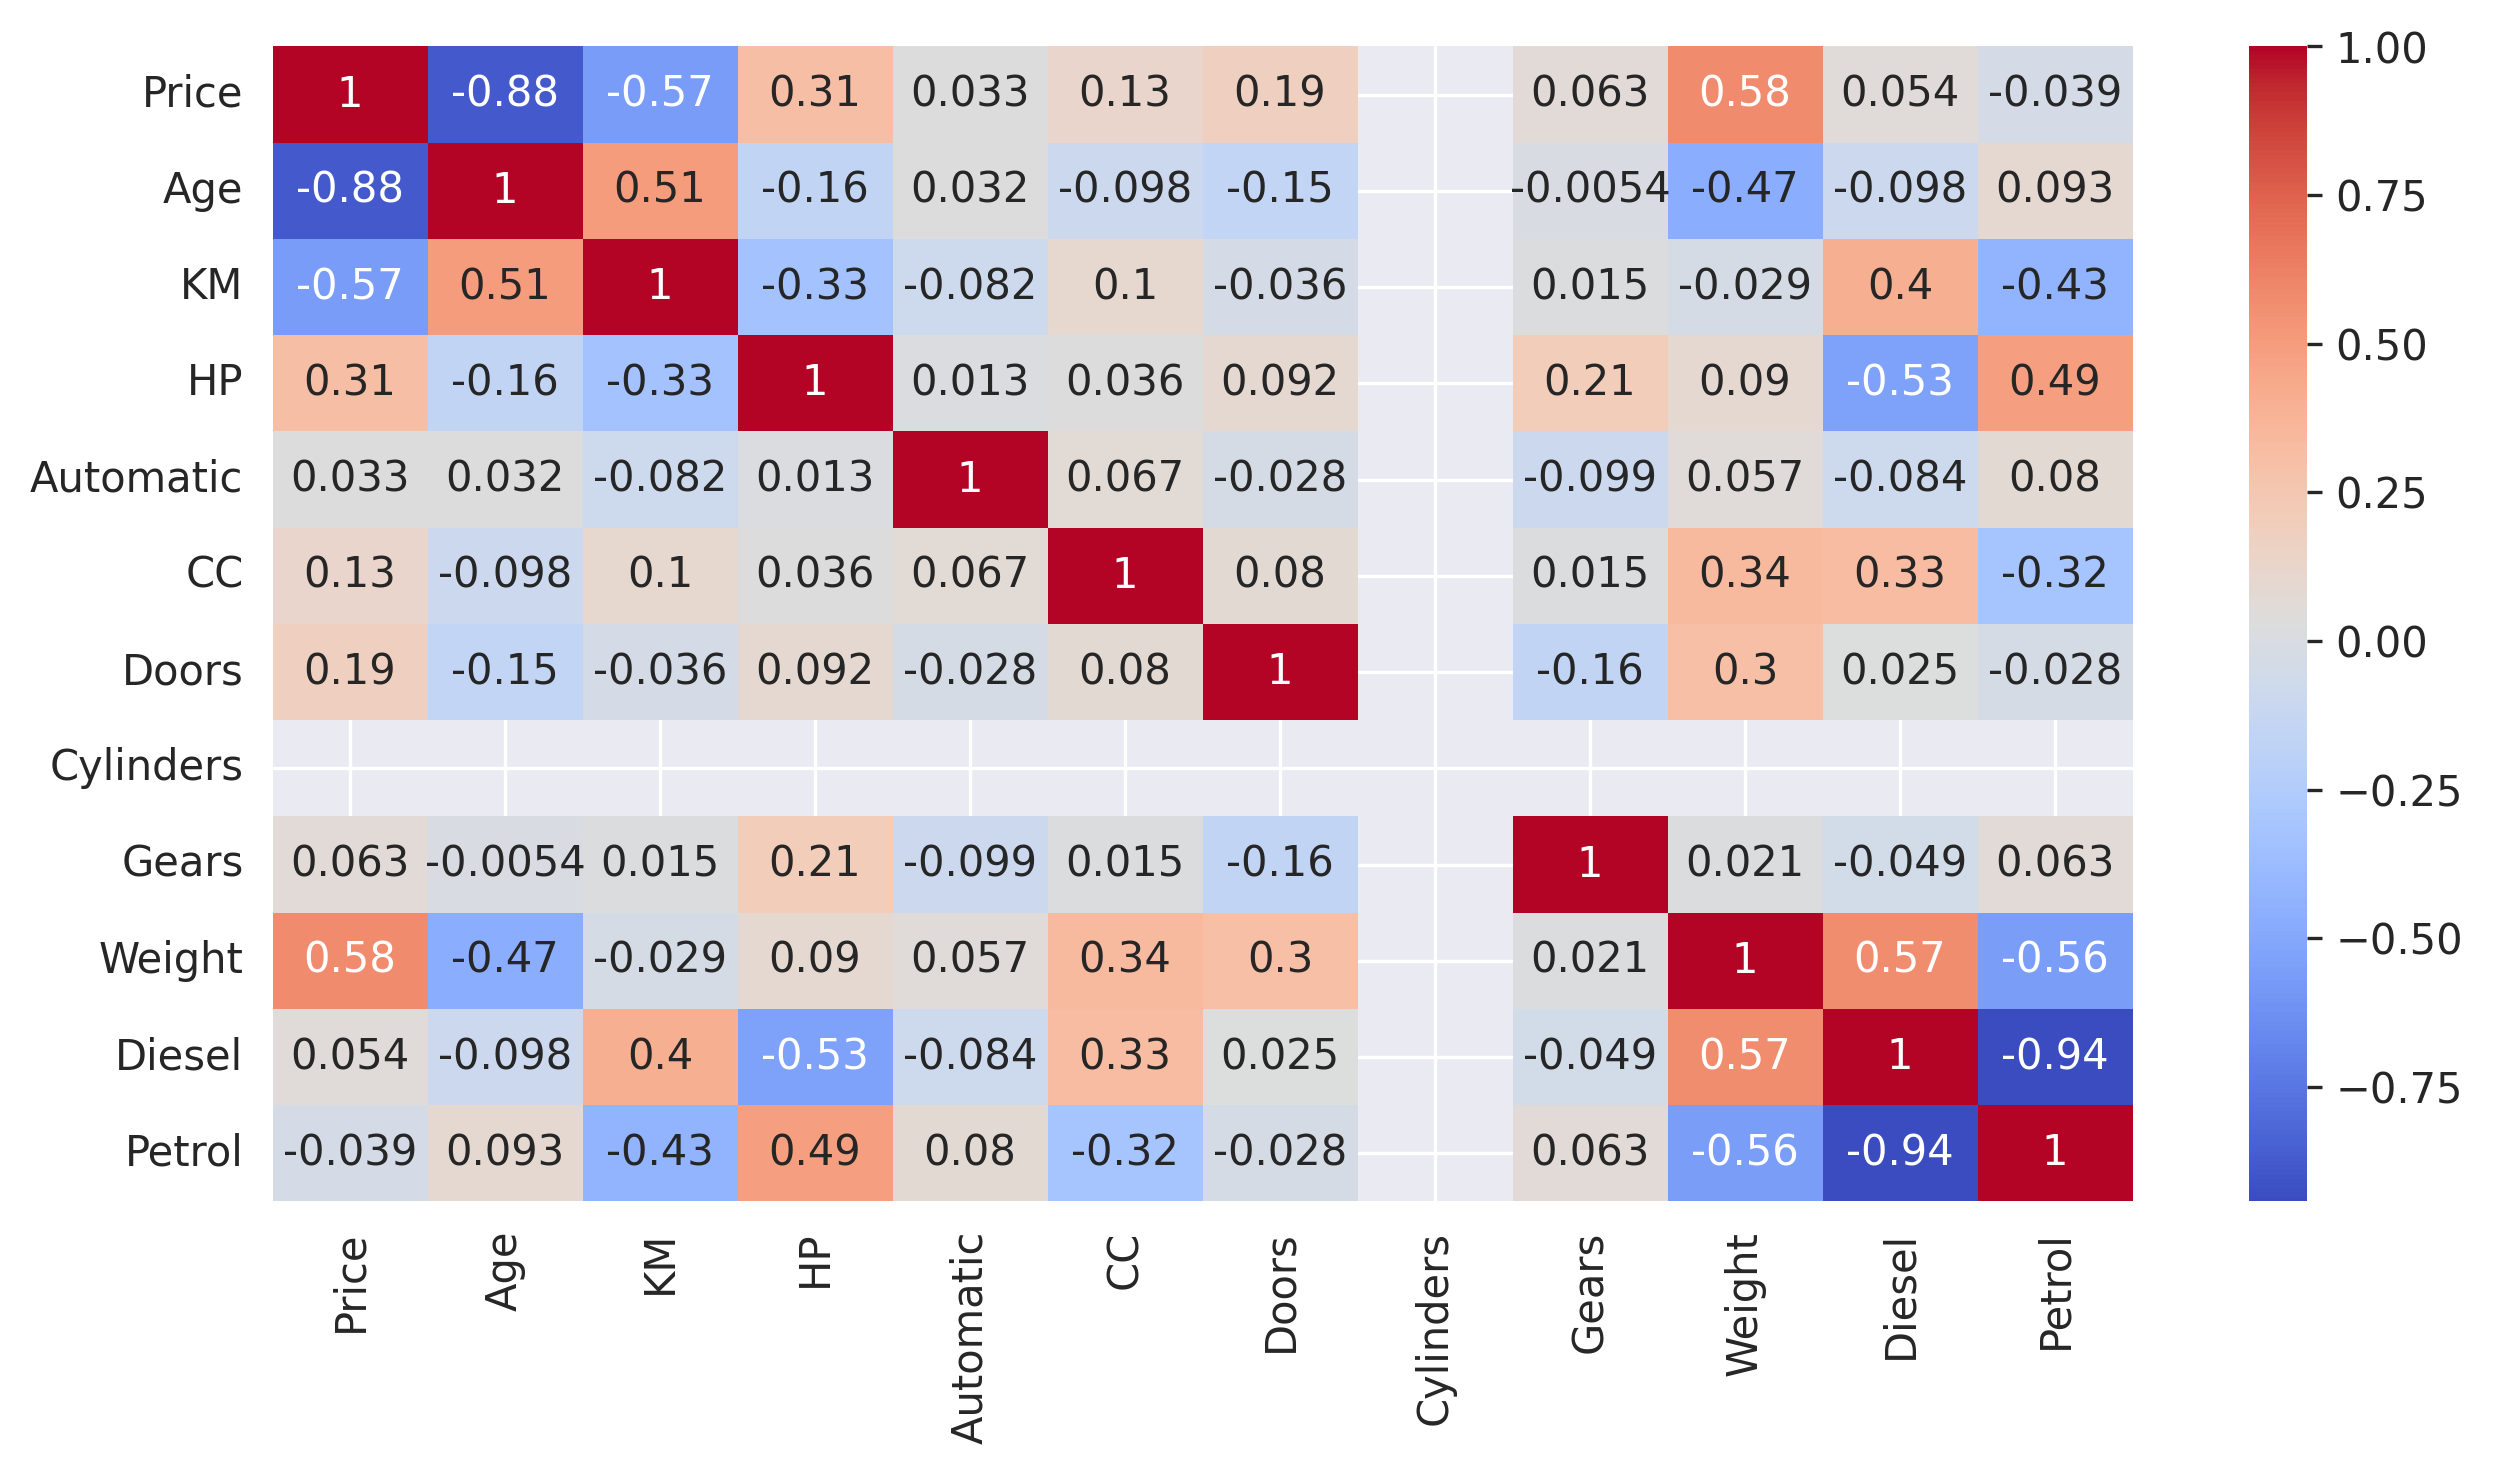

In [173]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# **model building**

In [174]:
model=smf.ols("Price~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+Diesel+Petrol",data=df).fit()

In [175]:
model.params

Intercept         -580.060541
Diesel[T.True]     554.054345
Petrol[T.True]    1144.096645
Age               -123.777069
KM                  -0.017523
HP                  23.526963
Automatic          300.259212
CC                  -0.055629
Doors              -30.356710
Cylinders        -2320.242164
Gears              622.798964
Weight              20.817390
dtype: float64

In [176]:
model.pvalues

Intercept          1.553540e-10
Diesel[T.True]     1.479298e-01
Petrol[T.True]     7.487350e-04
Age               2.563202e-292
KM                 2.205339e-37
HP                 6.531756e-11
Automatic          6.243429e-02
CC                 5.457514e-01
Doors              4.581674e-01
Cylinders          1.553540e-10
Gears              1.694943e-03
Weight             1.041115e-59
dtype: float64

In [177]:
model.rsquared

0.8649083778053923

# **residual Analysis**

In [178]:
import statsmodels.api as sm # for Q-Q plot function for error vspredicted

In [179]:
df.head()

Price  Age     KM  HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
0  13500   23  46986  90          0  2000      3          4      5    1165   
1  13750   23  72937  90          0  2000      3          4      5    1165   
2  13950   24  41711  90          0  2000      3          4      5    1165   
3  14950   26  48000  90          0  2000      3          4      5    1165   
4  13750   30  38500  90          0  2000      3          4      5    1170   

   Diesel  Petrol  
0    True   False  
1    True   False  
2    True   False  
3    True   False  
4    True   False

In [180]:
model.fittedvalues

0       16304.152422
1       15849.403232
2       16272.811172
3       15915.052508
4       15690.503276
            ...     
1431     8694.200430
1432     8141.751414
1433     8300.294866
1434     8425.824273
1435    10527.736468
Length: 1436, dtype: float64

In [181]:
model.resid

0      -2804.152422
1      -2099.403232
2      -2322.811172
3       -965.052508
4      -1940.503276
           ...     
1431   -1194.200430
1432    2703.248586
1433     199.705134
1434   -1175.824273
1435   -3577.736468
Length: 1436, dtype: float64

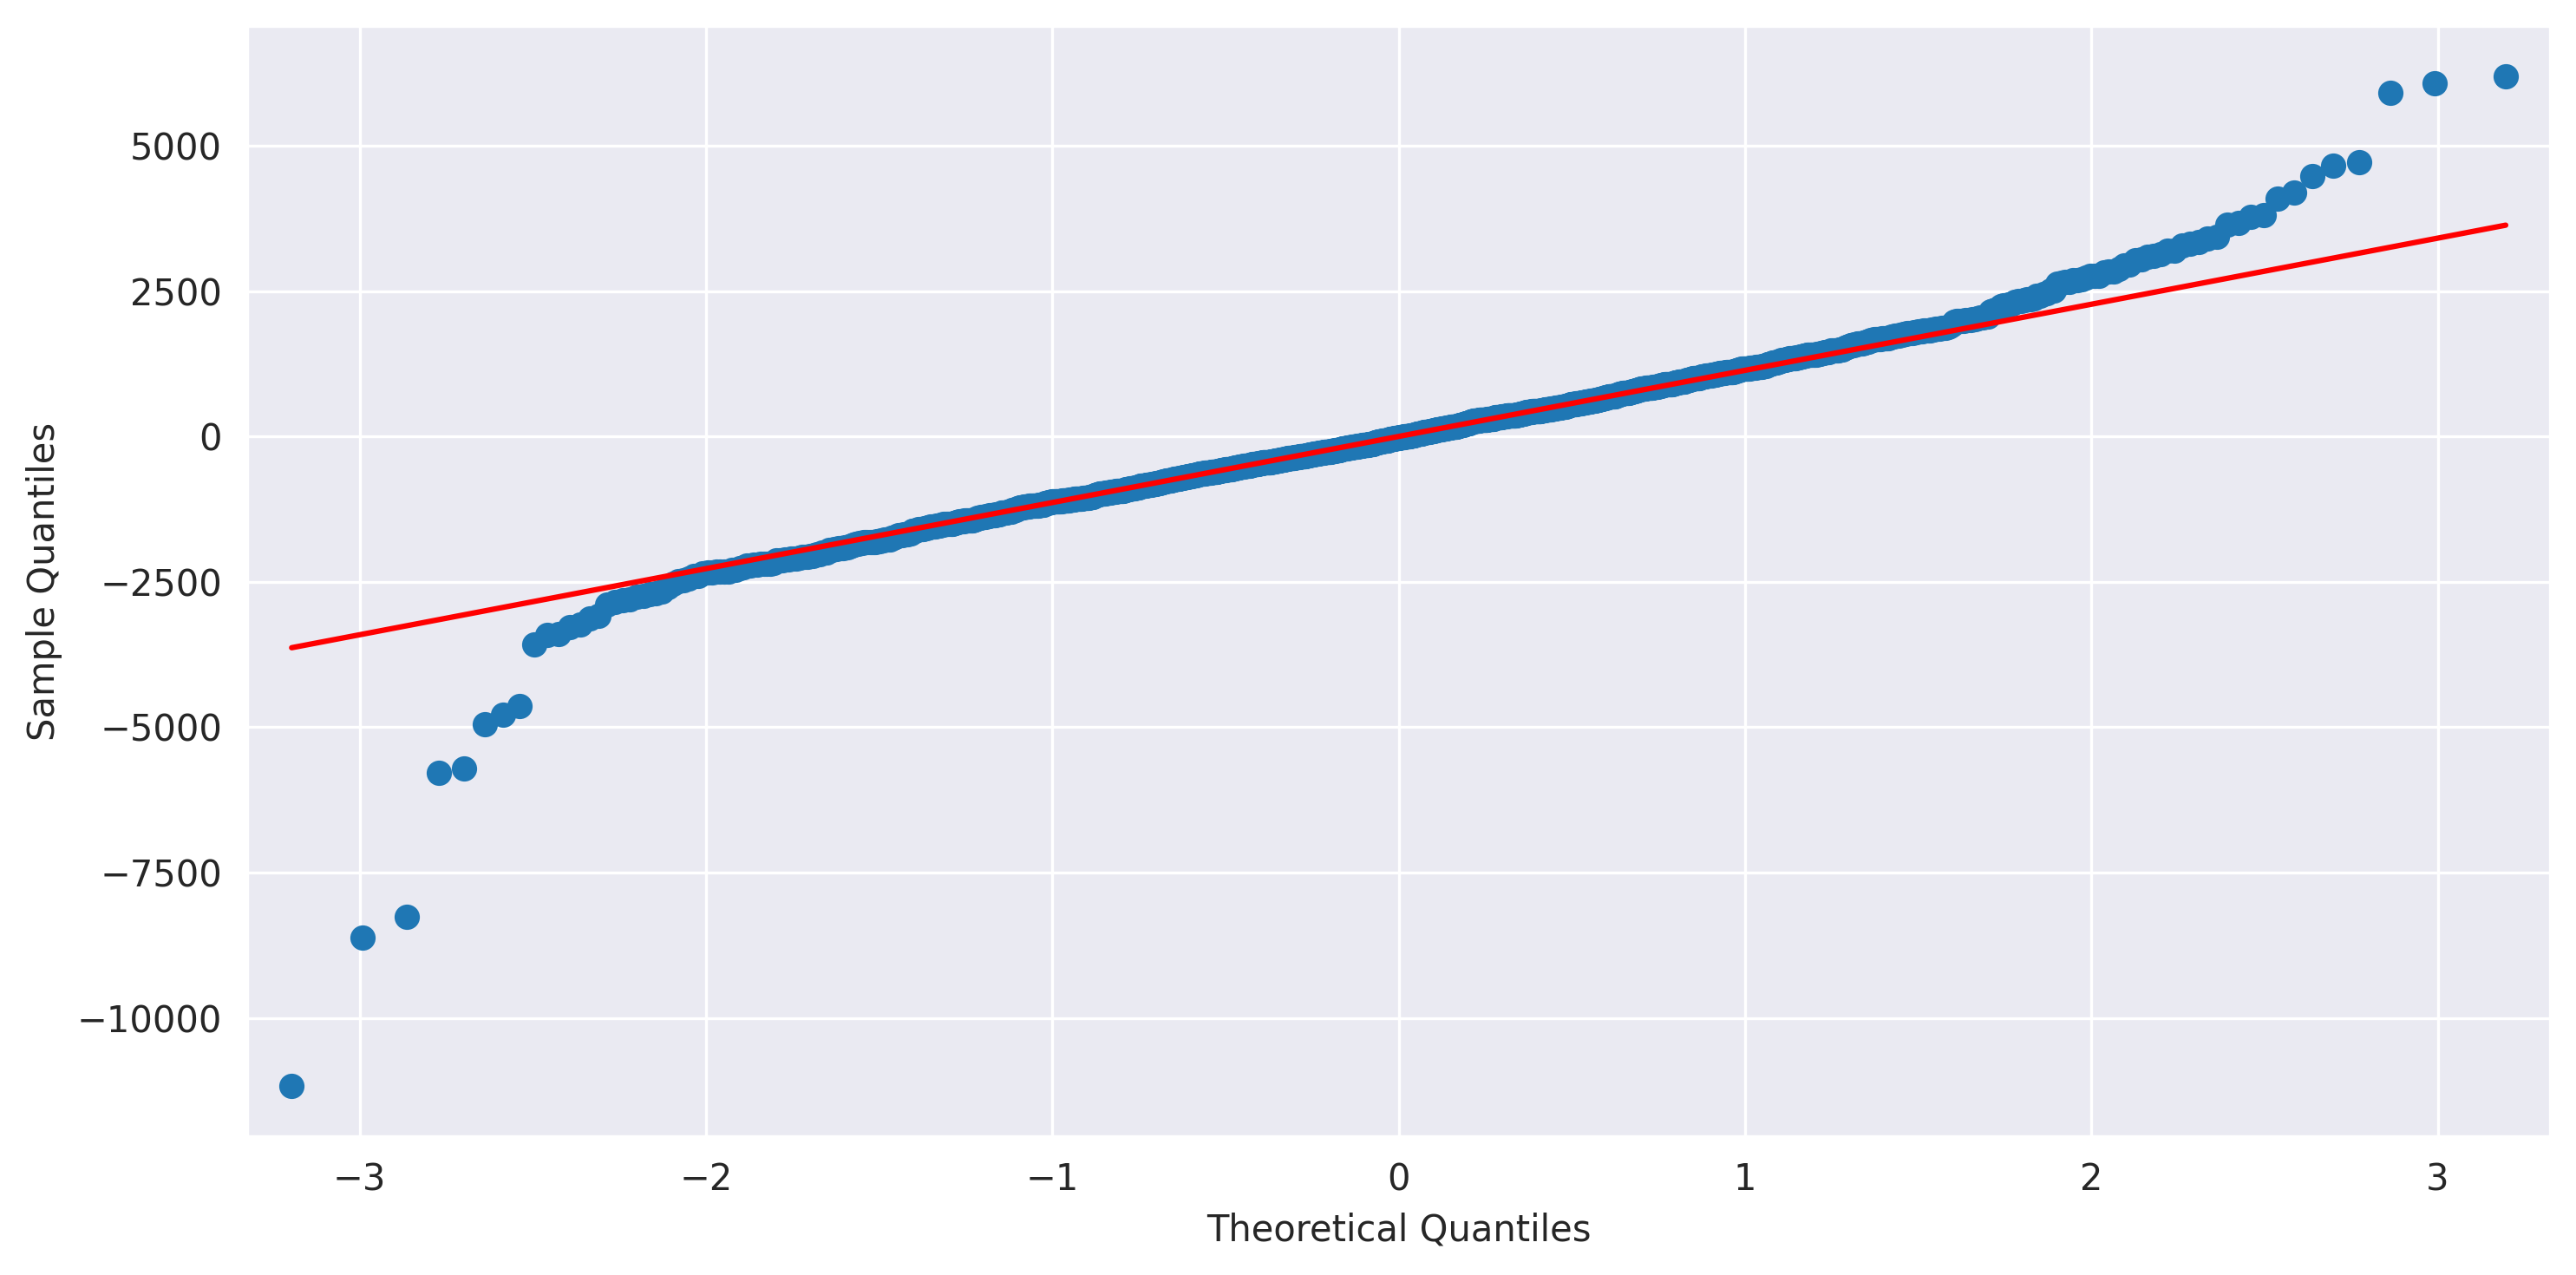

In [182]:
sm.qqplot(model.resid,line="q")
plt.tight_layout()

In [183]:
# get index of higher residuals
np.argmax(model.resid),np.max(model.resid)
# argmax() finds max error value and returns its index, max() will return max error

(147, 6191.469675925771)

# **Model deletion technique**

detecting influencers and outliers

In [184]:
model

In [185]:
#find influence data
inf=model.get_influence()

In [186]:
c,p=inf.cooks_distance

In [187]:
c

array([4.23218359e-03, 2.15175576e-03, 2.98539322e-03, ...,
       1.26359065e-05, 4.28390061e-04, 7.06463144e-03])

In [188]:
p

array([1., 1., 1., ..., 1., 1., 1.])

Text(0, 0.5, "cook's distence")

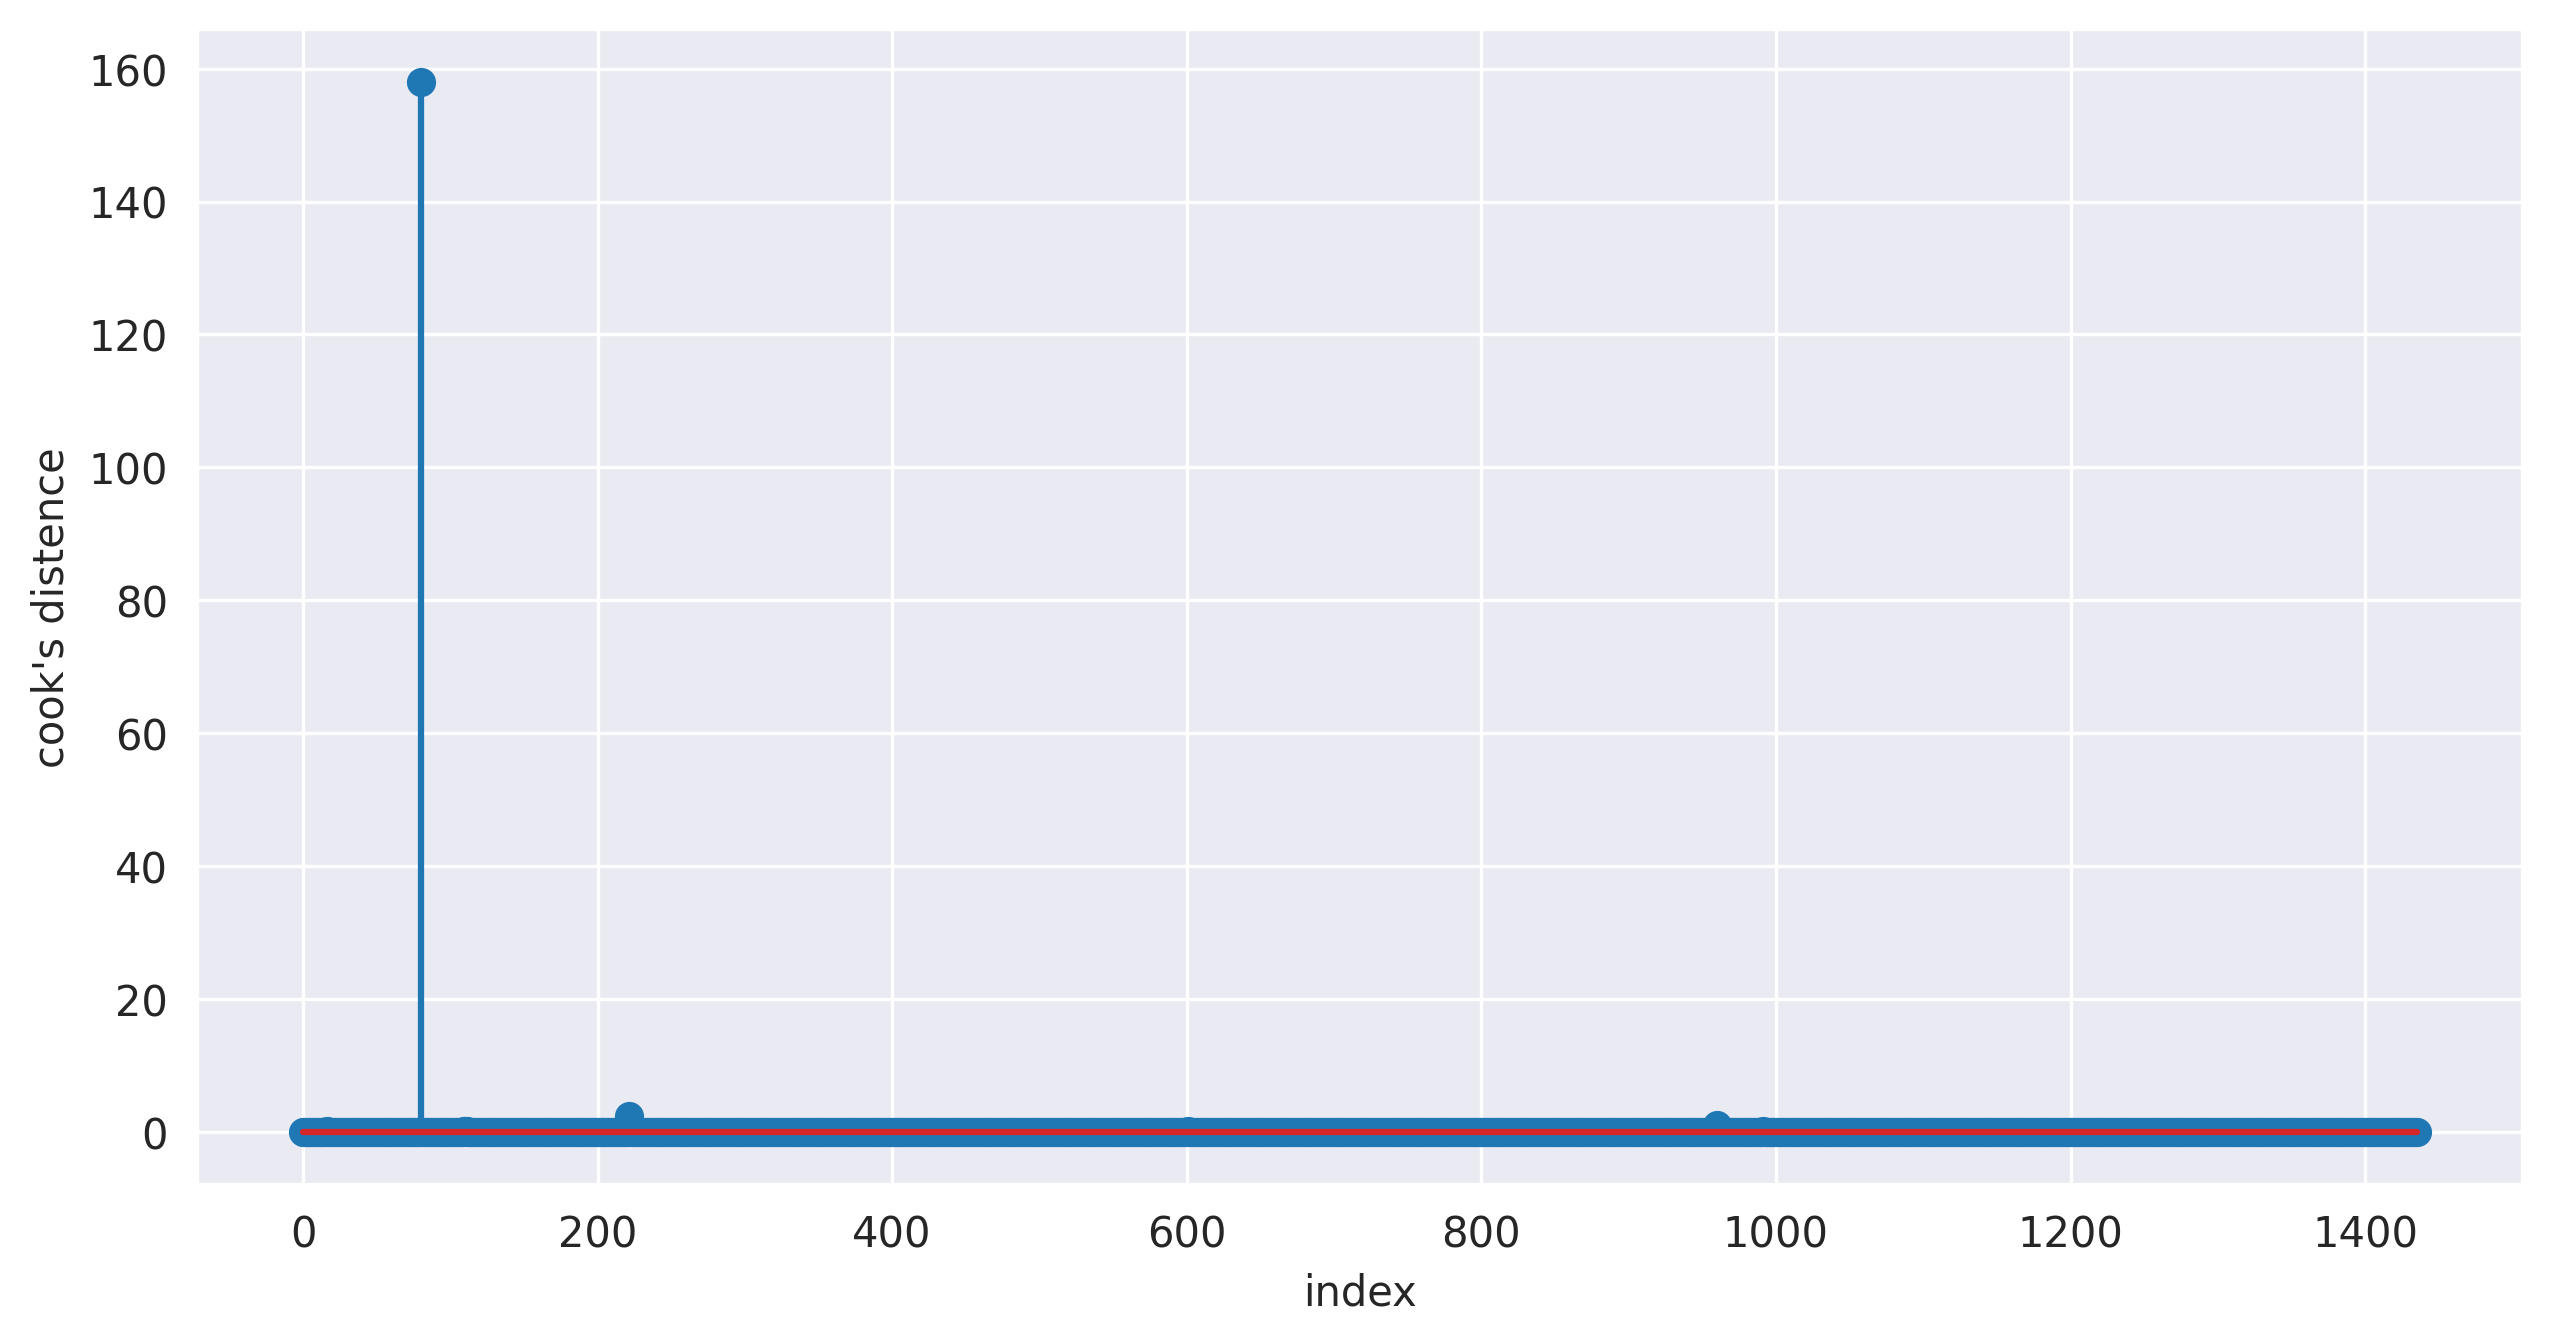

In [189]:
# cook's distence plot
plt.stem(c)
plt.xlabel("index")
plt.ylabel("cook's distence")

In [190]:
np.argmax(c),np.max(c)

(80, 158.05318703275412)

In [191]:
df.iloc[[80]]

Price  Age     KM   HP  Automatic     CC  Doors  Cylinders  Gears  Weight  \
80  18950   25  20019  110          1  16000      5          4      5    1180   

    Diesel  Petrol  
80   False    True

In [192]:
df.head()

Price  Age     KM  HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
0  13500   23  46986  90          0  2000      3          4      5    1165   
1  13750   23  72937  90          0  2000      3          4      5    1165   
2  13950   24  41711  90          0  2000      3          4      5    1165   
3  14950   26  48000  90          0  2000      3          4      5    1165   
4  13750   30  38500  90          0  2000      3          4      5    1170   

   Diesel  Petrol  
0    True   False  
1    True   False  
2    True   False  
3    True   False  
4    True   False

# **Improving the model**

In [193]:
df.drop(index=80,inplace=True)

In [194]:
df

Price  Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  \
0     13500   23  46986   90          0  2000      3          4      5   
1     13750   23  72937   90          0  2000      3          4      5   
2     13950   24  41711   90          0  2000      3          4      5   
3     14950   26  48000   90          0  2000      3          4      5   
4     13750   30  38500   90          0  2000      3          4      5   
...     ...  ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500   69  20544   86          0  1300      3          4      5   
1432  10845   72  19000   86          0  1300      3          4      5   
1433   8500   71  17016   86          0  1300      3          4      5   
1434   7250   70  16916   86          0  1300      3          4      5   
1435   6950   76      1  110          0  1600      5          4      5   

      Weight  Diesel  Petrol  
0       1165    True   False  
1       1165    True   False  
2       1165    True   False  
3       1165    True   False  
4       1170    True   False  
...      ...     ...     ...  
1431    1025   False    True  
1432    1015   False    True  
1433    1015   False    True  
1434    1015   False    True  
1435    1114   False    True  

[1435 rows x 12 columns]

In [195]:
df.reset_index(inplace=True)

In [196]:
df

index  Price  Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  \
0         0  13500   23  46986   90          0  2000      3          4      5   
1         1  13750   23  72937   90          0  2000      3          4      5   
2         2  13950   24  41711   90          0  2000      3          4      5   
3         3  14950   26  48000   90          0  2000      3          4      5   
4         4  13750   30  38500   90          0  2000      3          4      5   
...     ...    ...  ...    ...  ...        ...   ...    ...        ...    ...   
1430   1431   7500   69  20544   86          0  1300      3          4      5   
1431   1432  10845   72  19000   86          0  1300      3          4      5   
1432   1433   8500   71  17016   86          0  1300      3          4      5   
1433   1434   7250   70  16916   86          0  1300      3          4      5   
1434   1435   6950   76      1  110          0  1600      5          4      5   

      Weight  Diesel  Petrol  
0       1165    True   False  
1       1165    True   False  
2       1165    True   False  
3       1165    True   False  
4       1170    True   False  
...      ...     ...     ...  
1430    1025   False    True  
1431    1015   False    True  
1432    1015   False    True  
1433    1015   False    True  
1434    1114   False    True  

[1435 rows x 13 columns]

In [197]:
df.drop(columns=["index"],inplace=True)
df

Price  Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  \
0     13500   23  46986   90          0  2000      3          4      5   
1     13750   23  72937   90          0  2000      3          4      5   
2     13950   24  41711   90          0  2000      3          4      5   
3     14950   26  48000   90          0  2000      3          4      5   
4     13750   30  38500   90          0  2000      3          4      5   
...     ...  ...    ...  ...        ...   ...    ...        ...    ...   
1430   7500   69  20544   86          0  1300      3          4      5   
1431  10845   72  19000   86          0  1300      3          4      5   
1432   8500   71  17016   86          0  1300      3          4      5   
1433   7250   70  16916   86          0  1300      3          4      5   
1434   6950   76      1  110          0  1600      5          4      5   

      Weight  Diesel  Petrol  
0       1165    True   False  
1       1165    True   False  
2       1165    True   False  
3       1165    True   False  
4       1170    True   False  
...      ...     ...     ...  
1430    1025   False    True  
1431    1015   False    True  
1432    1015   False    True  
1433    1015   False    True  
1434    1114   False    True  

[1435 rows x 12 columns]

# **Splitting Training and testing data**

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [200]:
x

Age     KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
0      23  46986   90          0  2000      3          4      5    1165   
1      23  72937   90          0  2000      3          4      5    1165   
2      24  41711   90          0  2000      3          4      5    1165   
3      26  48000   90          0  2000      3          4      5    1165   
4      30  38500   90          0  2000      3          4      5    1170   
...   ...    ...  ...        ...   ...    ...        ...    ...     ...   
1430   69  20544   86          0  1300      3          4      5    1025   
1431   72  19000   86          0  1300      3          4      5    1015   
1432   71  17016   86          0  1300      3          4      5    1015   
1433   70  16916   86          0  1300      3          4      5    1015   
1434   76      1  110          0  1600      5          4      5    1114   

      Diesel  Petrol  
0       True   False  
1       True   False  
2       True   False  
3       True   False  
4       True   False  
...      ...     ...  
1430   False    True  
1431   False    True  
1432   False    True  
1433   False    True  
1434   False    True  

[1435 rows x 11 columns]

In [201]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1435, dtype: int64

In [255]:
#Splitting the data into 80% training data and 20% testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [256]:
x_train

Age      KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
1322   80   66843  110          0  1600      5          4      5    1075   
609    68  155720   86          0  1300      3          4      5    1015   
511    51   53268  110          0  1600      5          4      5    1080   
877    60   61977   86          0  1300      3          4      5    1015   
1274   80   74151  110          0  1600      3          4      5    1050   
...   ...     ...  ...        ...   ...    ...        ...    ...     ...   
763    59   79660   86          1  1300      5          4      5    1065   
835    68   67146  110          0  1600      5          4      5    1075   
1216   80   85565  110          0  1600      5          4      5    1070   
559    54   39291  110          0  1600      3          4      5    1040   
684    61  100748  110          0  1600      5          4      5    1070   

      Diesel  Petrol  
1322   False    True  
609    False    True  
511    False    True  
877    False    True  
1274   False    True  
...      ...     ...  
763    False    True  
835    False    True  
1216   False    True  
559    False    True  
684    False    True  

[1148 rows x 11 columns]

In [257]:
y_train

1322     9450
609      6950
511     13950
877      8500
1274     7250
        ...  
763     10950
835     10950
1216     8250
559     10950
684      8950
Name: Price, Length: 1148, dtype: int64

In [258]:
x_test

Age      KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
651    63  115000  110          0  1600      3          4      5    1109   
411    48   98100   69          0  1900      5          4      5    1140   
342    41   29056   97          0  1400      5          4      5    1060   
1297   78   71186  110          0  1600      3          4      5    1050   
483    54   62519   97          0  1400      3          4      5    1025   
...   ...     ...  ...        ...   ...    ...        ...    ...     ...   
1046   79  207114  110          0  1600      5          4      5    1114   
1013   65   36000  110          0  1600      3          4      6    1065   
520    51   50000   86          0  1300      5          4      5    1045   
994    68   42750  110          0  1600      3          4      5    1050   
333    34   32431   97          0  1400      5          4      5    1060   

      Diesel  Petrol  
651    False   False  
411     True   False  
342    False    True  
1297   False    True  
483    False    True  
...      ...     ...  
1046   False   False  
1013   False    True  
520    False    True  
994    False    True  
333    False    True  

[287 rows x 11 columns]

In [259]:
y_test

651      9450
411      8950
342     11950
1297     7500
483      9500
        ...  
1046     5250
1013    10450
520     11950
994      9950
333     12400
Name: Price, Length: 287, dtype: int64

In [260]:
xt=x_train

In [208]:
xt

Age      KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
1322   80   66843  110          0  1600      5          4      5    1075   
609    68  155720   86          0  1300      3          4      5    1015   
511    51   53268  110          0  1600      5          4      5    1080   
877    60   61977   86          0  1300      3          4      5    1015   
1274   80   74151  110          0  1600      3          4      5    1050   
...   ...     ...  ...        ...   ...    ...        ...    ...     ...   
763    59   79660   86          1  1300      5          4      5    1065   
835    68   67146  110          0  1600      5          4      5    1075   
1216   80   85565  110          0  1600      5          4      5    1070   
559    54   39291  110          0  1600      3          4      5    1040   
684    61  100748  110          0  1600      5          4      5    1070   

      Diesel  Petrol  
1322   False    True  
609    False    True  
511    False    True  
877    False    True  
1274   False    True  
...      ...     ...  
763    False    True  
835    False    True  
1216   False    True  
559    False    True  
684    False    True  

[1148 rows x 11 columns]

In [261]:
xt["y_train"]=y_train

In [262]:
xt

Age      KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
1322   80   66843  110          0  1600      5          4      5    1075   
609    68  155720   86          0  1300      3          4      5    1015   
511    51   53268  110          0  1600      5          4      5    1080   
877    60   61977   86          0  1300      3          4      5    1015   
1274   80   74151  110          0  1600      3          4      5    1050   
...   ...     ...  ...        ...   ...    ...        ...    ...     ...   
763    59   79660   86          1  1300      5          4      5    1065   
835    68   67146  110          0  1600      5          4      5    1075   
1216   80   85565  110          0  1600      5          4      5    1070   
559    54   39291  110          0  1600      3          4      5    1040   
684    61  100748  110          0  1600      5          4      5    1070   

      Diesel  Petrol  y_train  
1322   False    True     9450  
609    False    True     6950  
511    False    True    13950  
877    False    True     8500  
1274   False    True     7250  
...      ...     ...      ...  
763    False    True    10950  
835    False    True    10950  
1216   False    True     8250  
559    False    True    10950  
684    False    True     8950  

[1148 rows x 12 columns]

# **Building** the model for training data

## **MODEL 1**

In [263]:
model=smf.ols("y_train~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+Diesel+Petrol",data=xt).fit()

In [264]:
model.params

Intercept         -244.143279
Diesel[T.True]    3272.723661
Petrol[T.True]    1038.174941
Age               -124.075679
KM                  -0.017124
HP                  55.636059
Automatic          348.513683
CC                  -3.602329
Doors               25.085203
Cylinders         -976.573115
Gears              513.991713
Weight              17.724705
dtype: float64

In [265]:
model.rsquared

0.8627465222832907

In [266]:
y_pred=model.predict(x_test)
y_pred

651      8721.716842
411     11382.826410
342     13140.097924
1297     7603.259362
483     10283.566656
            ...     
1046     5297.961975
1013    10598.622066
520     11023.066788
994      9330.947363
333     13950.834990
Length: 287, dtype: float64

In [267]:
y_test

651      9450
411      8950
342     11950
1297     7500
483      9500
        ...  
1046     5250
1013    10450
520     11950
994      9950
333     12400
Name: Price, Length: 287, dtype: int64

In [268]:
pd.crosstab(y_test,y_pred)

col_0  5297.961975   5626.035318   5853.699421   5914.530566   6024.108356   \
Price                                                                         
4400              0             0             0             0             1   
5250              1             0             0             0             0   
5751              0             0             0             0             0   
5950              0             0             0             0             0   
6550              0             0             1             0             0   
...             ...           ...           ...           ...           ...   
21750             0             0             0             0             0   
21950             0             0             0             0             0   
22500             0             0             0             0             0   
23950             0             0             0             0             0   
32500             0             0             0             0             0   

col_0  6089.296441   6121.116481   6122.118631   6205.521252   6531.593064   \
Price                                                                         
4400              0             0             0             0             0   
5250              0             0             0             0             0   
5751              0             0             0             0             0   
5950              0             0             0             1             0   
6550              0             0             0             0             0   
...             ...           ...           ...           ...           ...   
21750             0             0             0             0             0   
21950             0             0             0             0             0   
22500             0             0             0             0             0   
23950             0             0             0             0             0   
32500             0             0             0             0             0   

col_0  ...  18454.732615  18589.938737  18602.697352  18869.329466  \
Price  ...                                                           
4400   ...             0             0             0             0   
5250   ...             0             0             0             0   
5751   ...             0             0             0             0   
5950   ...             0             0             0             0   
6550   ...             0             0             0             0   
...    ...           ...           ...           ...           ...   
21750  ...             0             0             0             0   
21950  ...             0             0             0             0   
22500  ...             0             0             0             0   
23950  ...             0             0             0             0   
32500  ...             0             0             0             0   

col_0  19719.872848  20693.779460  20758.141253  21047.279108  22056.081408  \
Price                                                                         
4400              0             0             0             0             0   
5250              0             0             0             0             0   
5751              0             0             0             0             0   
5950              0             0             0             0             0   
6550              0             0             0             0             0   
...             ...           ...           ...           ...           ...   
21750             0             0             0             0             0   
21950             0             0             1             0             0   
22500             0             1             0             0             0   
23950             0             0             0             0             1   
32500             0             0             0             0             0   

col_0

## **MODEL 2**

In [269]:
model1=smf.ols("y_train~Age+KM+HP+Automatic+CC+Gears+Weight+Diesel+Petrol",data=xt).fit()

In [270]:
model1.params

Intercept        -4220.021611
Diesel[T.True]    3227.571398
Petrol[T.True]    1051.719012
Age               -124.126624
KM                  -0.017050
HP                  55.143214
Automatic          337.782727
CC                  -3.556420
Gears              492.530041
Weight              17.956176
dtype: float64

In [271]:
model1.rsquared

0.862710519564019

In [272]:
y_pred=model1.predict(x_test)
y_pred

651      8750.750006
411     11357.214135
342     13113.193472
1297     7628.196175
483     10300.527732
            ...     
1046     5283.935551
1013    10603.646067
520     10994.550204
994      9354.304134
333     13924.535150
Length: 287, dtype: float64

## **MODEL 3**

In [273]:
model3=smf.ols("y_train~KM+HP+CC+Gears+Weight+Diesel+Petrol",data=xt).fit()

In [274]:
model3.params

Intercept        -24849.587740
Diesel[T.True]     3995.226897
Petrol[T.True]     -358.609800
KM                   -0.049545
HP                   70.069434
CC                   -6.096947
Gears               661.900916
Weight               35.379264
dtype: float64

In [275]:
model3.rsquared


0.6494623991109593

In [276]:
y_pred=model3.predict(x_test)
y_pred

651      9950.321600
411     11177.692256
342     12424.745330
1297     9675.117806
483      9528.533008
            ...     
1046     5563.391993
1013    12611.012497
520     10695.308206
994     11083.991095
333     12257.529570
Length: 287, dtype: float64

In [277]:
model3.fittedvalues

1322    10774.775135
609      4395.989490
511     11624.250402
877      9040.524893
1274     9528.215664
            ...     
763      9933.376624
835     10759.762875
1216     9670.289640
559     10901.576025
684      8918.041674
Length: 1148, dtype: float64

# **Lasso Ridge Method**

In [278]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [280]:
x_train

Age      KM   HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
1322   80   66843  110          0  1600      5          4      5    1075   
609    68  155720   86          0  1300      3          4      5    1015   
511    51   53268  110          0  1600      5          4      5    1080   
877    60   61977   86          0  1300      3          4      5    1015   
1274   80   74151  110          0  1600      3          4      5    1050   
...   ...     ...  ...        ...   ...    ...        ...    ...     ...   
763    59   79660   86          1  1300      5          4      5    1065   
835    68   67146  110          0  1600      5          4      5    1075   
1216   80   85565  110          0  1600      5          4      5    1070   
559    54   39291  110          0  1600      3          4      5    1040   
684    61  100748  110          0  1600      5          4      5    1070   

      Diesel  Petrol  y_train  
1322   False    True     9450  
609    False    True     6950  
511    False    True    13950  
877    False    True     8500  
1274   False    True     7250  
...      ...     ...      ...  
763    False    True    10950  
835    False    True    10950  
1216   False    True     8250  
559    False    True    10950  
684    False    True     8950  

[1148 rows x 12 columns]

In [281]:
x_train=x_train.drop(columns=["y_train"])

In [282]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [283]:
x_train_scaled

array([[ 1.28974146, -0.05477603,  0.59639508, ...,  0.03787351,
        -0.35735329,  0.37570345],
       [ 0.6421206 ,  2.29773695, -1.04482319, ..., -1.08175203,
        -0.35735329,  0.37570345],
       [-0.27534229, -0.41409693,  0.59639508, ...,  0.13117564,
        -0.35735329,  0.37570345],
       ...,
       [ 1.28974146,  0.44078242,  0.59639508, ..., -0.05542862,
        -0.35735329,  0.37570345],
       [-0.11343708, -0.78405849,  0.59639508, ..., -0.61524139,
        -0.35735329,  0.37570345],
       [ 0.26434176,  0.84266597,  0.59639508, ..., -0.05542862,
        -0.35735329,  0.37570345]])

In [284]:
x_test_scaled

array([[ 0.37227857,  1.2199066 ,  0.59639508, ...,  0.67232799,
        -0.35735329, -2.66167373],
       [-0.43724751,  0.77257524, -2.2073528 , ...,  1.25080119,
         2.79835116, -2.66167373],
       [-0.81502634, -1.05497189, -0.29259815, ..., -0.24203287,
        -0.35735329,  0.37570345],
       ...,
       [-0.27534229, -0.50059864, -1.04482319, ..., -0.52193926,
        -0.35735329,  0.37570345],
       [ 0.6421206 , -0.69250114,  0.59639508, ..., -0.42863713,
        -0.35735329,  0.37570345],
       [-1.19280518, -0.96563797, -0.29259815, ..., -0.24203287,
        -0.35735329,  0.37570345]])

In [285]:
# Apply Lasso and Ridge methods
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)


In [287]:
# Ridge
ridge = Ridge(alpha=1)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)


In [289]:
# Display Lasso and Ridge coefficients
lasso_coeff = pd.DataFrame({'Feature': x.columns, 'Lasso_Coefficient': lasso.coef_})
ridge_coeff = pd.DataFrame({'Feature': x.columns, 'Ridge_Coefficient': ridge.coef_})

lasso_coeff, ridge_coeff

(      Feature  Lasso_Coefficient
 0         Age       -2299.053624
 1          KM        -647.080561
 2          HP         811.463241
 3   Automatic          77.349372
 4          CC        -678.046630
 5       Doors          23.672798
 6   Cylinders           0.000000
 7       Gears         103.005008
 8      Weight         950.197258
 9      Diesel        1031.807154
 10     Petrol         339.831128,
       Feature  Ridge_Coefficient
 0         Age       -2296.796159
 1          KM        -649.343593
 2          HP         798.664115
 3   Automatic          76.641213
 4          CC        -662.775213
 5       Doors          23.315869
 6   Cylinders           0.000000
 7       Gears         104.286823
 8      Weight         952.658036
 9      Diesel        1002.453029
 10     Petrol         329.795930)